# Diffusion of 2 chemicals

### Identical to experiment `diffusion_2_a` EXCEPT for some extra rows of bins at the top of the system (high y-bin values), which breaks the previously-perfect symmetry of the 2 chemicals: now, one of them (`A`) is more "hemmed in by the walls", compared to the other one

### TAGS :  "diffusion 2D", "basic"

In [1]:
LAST_REVISED = "Jan. 17, 2025"
LIFE123_VERSION = "1.0.0rc2"        # Library version this experiment is based on

In [2]:
#import set_path                    # Using MyBinder?  Uncomment this before running the next cell!

In [3]:
#import sys
#sys.path.append("C:/some_path/my_env_or_install")   # CHANGE to the folder containing your venv or libraries installation!
# NOTE: If any of the imports below can't find a module, uncomment the lines above, or try:  import set_path   

from life123 import BioSim2D, ChemData, check_version

In [4]:
check_version(LIFE123_VERSION)

OK


In [5]:
# Prepare the initial system, with two concentration pulses, at almost-opposite ends of the system, with the same diffusion rate coefficient
chem_data = ChemData(names=["A", "B"], diffusion_rates=[0.05, 0.05])

bio = BioSim2D(x_bins=7, y_bins=10, chem_data=chem_data)  # 3 more rows, compared to experiment `diffusion_2_a` 

bio.set_bin_conc(bin_x = 1, bin_y = 1, chem_label="A", conc=10.)
bio.set_bin_conc(bin_x = 5, bin_y = 5, chem_label="B", conc=10.)

### Different ways to visualize the system   
Notice the bin with the initial concentration of `A` and the other bin with the initial concentration of `B`

In [6]:
bio.describe_state()

SYSTEM STATE at Time t = 0:
Species `A`:
     0     1    2    3    4    5    6
9  0.0   0.0  0.0  0.0  0.0  0.0  0.0
8  0.0   0.0  0.0  0.0  0.0  0.0  0.0
7  0.0   0.0  0.0  0.0  0.0  0.0  0.0
6  0.0   0.0  0.0  0.0  0.0  0.0  0.0
5  0.0   0.0  0.0  0.0  0.0  0.0  0.0
4  0.0   0.0  0.0  0.0  0.0  0.0  0.0
3  0.0   0.0  0.0  0.0  0.0  0.0  0.0
2  0.0   0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  10.0  0.0  0.0  0.0  0.0  0.0
0  0.0   0.0  0.0  0.0  0.0  0.0  0.0
Species `B`:
     0    1    2    3    4     5    6
9  0.0  0.0  0.0  0.0  0.0   0.0  0.0
8  0.0  0.0  0.0  0.0  0.0   0.0  0.0
7  0.0  0.0  0.0  0.0  0.0   0.0  0.0
6  0.0  0.0  0.0  0.0  0.0   0.0  0.0
5  0.0  0.0  0.0  0.0  0.0  10.0  0.0
4  0.0  0.0  0.0  0.0  0.0   0.0  0.0
3  0.0  0.0  0.0  0.0  0.0   0.0  0.0
2  0.0  0.0  0.0  0.0  0.0   0.0  0.0
1  0.0  0.0  0.0  0.0  0.0   0.0  0.0
0  0.0  0.0  0.0  0.0  0.0   0.0  0.0


In [7]:
bio.system_snapshot(chem_label="A")

0     1    2    3    4    5    6
9  0.0   0.0  0.0  0.0  0.0  0.0  0.0
8  0.0   0.0  0.0  0.0  0.0  0.0  0.0
7  0.0   0.0  0.0  0.0  0.0  0.0  0.0
6  0.0   0.0  0.0  0.0  0.0  0.0  0.0
5  0.0   0.0  0.0  0.0  0.0  0.0  0.0
4  0.0   0.0  0.0  0.0  0.0  0.0  0.0
3  0.0   0.0  0.0  0.0  0.0  0.0  0.0
2  0.0   0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  10.0  0.0  0.0  0.0  0.0  0.0
0  0.0   0.0  0.0  0.0  0.0  0.0  0.0

In [8]:
bio.system_snapshot(chem_label="B")

0    1    2    3    4     5    6
9  0.0  0.0  0.0  0.0  0.0   0.0  0.0
8  0.0  0.0  0.0  0.0  0.0   0.0  0.0
7  0.0  0.0  0.0  0.0  0.0   0.0  0.0
6  0.0  0.0  0.0  0.0  0.0   0.0  0.0
5  0.0  0.0  0.0  0.0  0.0  10.0  0.0
4  0.0  0.0  0.0  0.0  0.0   0.0  0.0
3  0.0  0.0  0.0  0.0  0.0   0.0  0.0
2  0.0  0.0  0.0  0.0  0.0   0.0  0.0
1  0.0  0.0  0.0  0.0  0.0   0.0  0.0
0  0.0  0.0  0.0  0.0  0.0   0.0  0.0

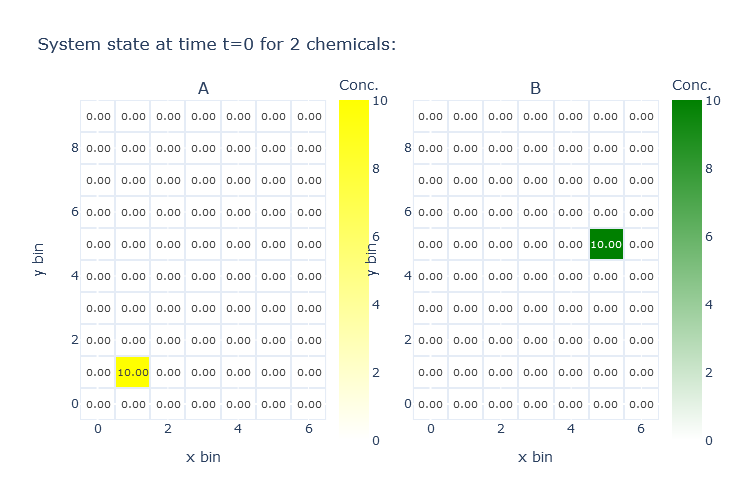

In [9]:
bio.system_heatmaps()

Notice that the bins with the initial concentration pulses lie on a diagonal from each other, but one is closer to the system "walls"

## Request history-keeping for some bins

In [10]:
# Request to save the concentration history of all chemicals at selected bins 
bio.enable_history(bins=[(1,1), (3,3), (1,6)], frequency=5, take_snapshot=True)    # Taking a snapshot to include the current initial state in the history

History enabled for bins [(1, 1), (3, 3), (1, 6)] and chemicals None (None means 'all')


# Initial Diffusion Step

In [11]:
delta_time = 2.5

In [12]:
status = bio.diffuse(total_duration=delta_time, time_step=0.1)
print("\n", status)

bio.system_heatmaps(title_prefix="Diffusion")


 {'steps': 25}


In [13]:
# MASS-CONSERVATION CHECK. Verify that that sum of all the entries in each of the above matrices is still the initial 10.
bio.check_mass_conservation(chem_label="A", expected=10.) \
and \
bio.check_mass_conservation(chem_label="B", expected=10.)

True

# A second step

In [14]:
status = bio.diffuse(total_duration=delta_time, time_step=0.1)
print("\n", status)

bio.system_heatmaps(title_prefix="Diffusion")


 {'steps': 25}


## This is still an early stage in the diffusion process; let's advance it more... (Visualization from results shown at selected times)

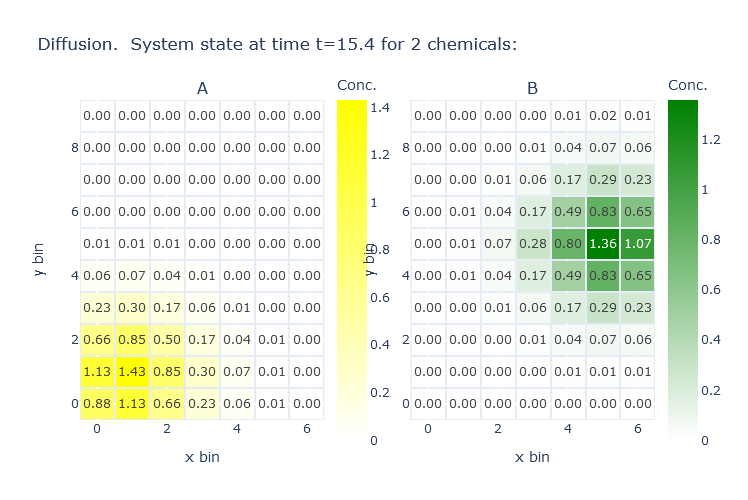

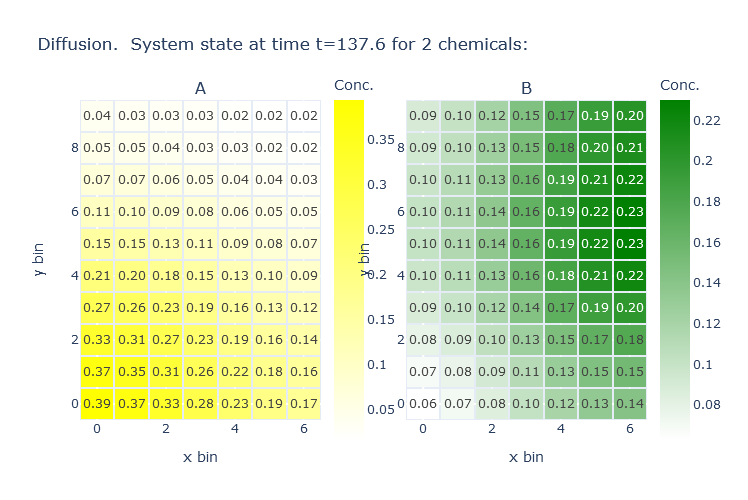

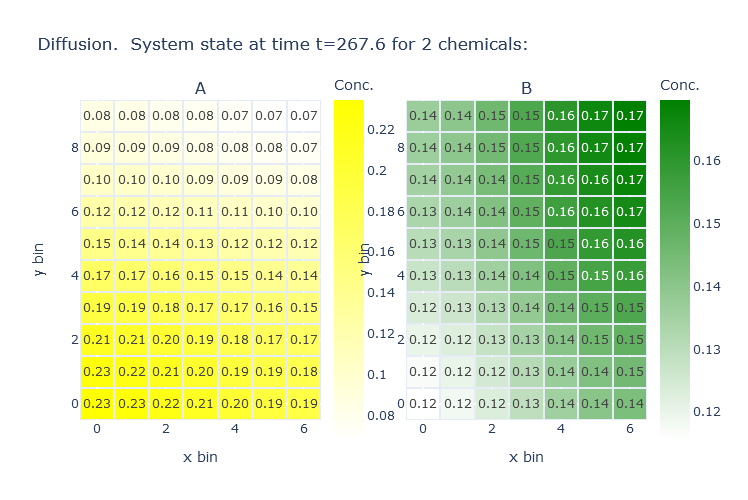

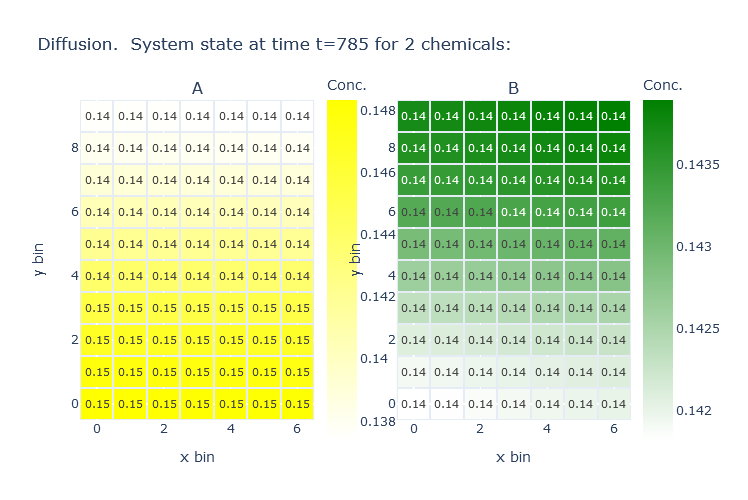

In [15]:
for i in range(300):
    status = bio.diffuse(total_duration=delta_time, time_step=0.2)

    if i==3 or i==20 or i==50 or i==100 or i==299:
        fig = bio.system_heatmaps(title_prefix="Diffusion")
        fig.show()

# All bins now have essentially uniform concentration. The diffusion has reached equilibrium

Notice how `B`, further away from walls compared to `A`, has an opportunity to spread out more quickly, in spite of the same diffusion rate coefficient

**Mass conservations**: the initial "10. units of concentration" are now uniformly spread across the 70 (7x10) bins, leading to a near-constant concentration of 10./60

In [16]:
10./70

0.14285714285714285

In [17]:
# Mass conservation for both `A` and `B` can also be verified as follows:
bio.check_mass_conservation(chem_label="A", expected=10.)

True

In [18]:
bio.check_mass_conservation(chem_label="B", expected=10.)

True

## Visualization of time changes at particular bins

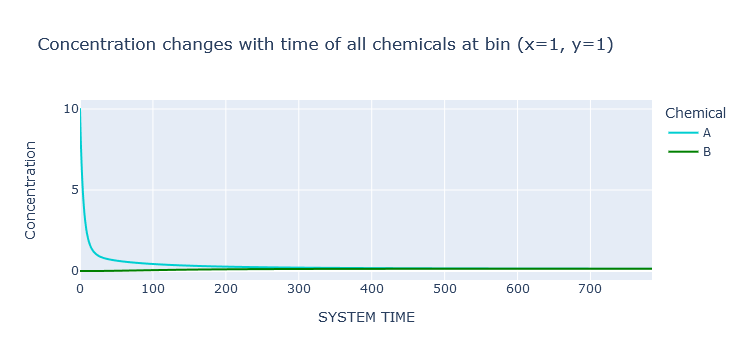

In [19]:
bio.plot_history_single_bin(bin_address=(1,1))    # The bin with the initial pulse of `A`

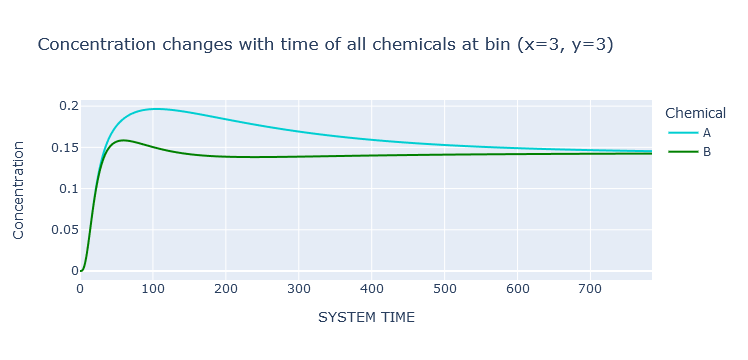

In [20]:
bio.plot_history_single_bin(bin_address=(3,3))    # The bin halfway between the initial pulses of `A` and `B`

Even thought bin (3,3) is exactly halfway between the bins with the initial pulses of `A` and `B`, **an asymmetry develops** because `A` is more "hemmed in by walls", and has fewer directions to spread out, including towards (3,3), while `B` also dilutes away towards the top (high y-bin values) of the system.  Thus `A` arrives more quickly.  
(Compare to the perfect overlap in experiment `diffusion_2_a`) 

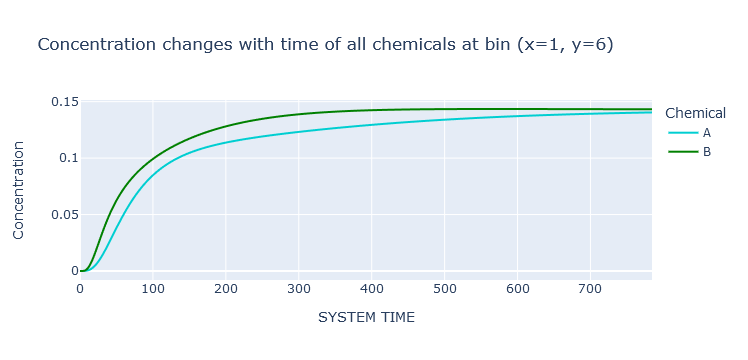

In [21]:
bio.plot_history_single_bin(bin_address=((1, 6))) # Distance from (1,1), with the initial pulse of `A`, is 5;  
                                                  # distance from (5,5), with the initial pulse of `B`, is 4.12

`B` arrives more quickly at this bin, until `A` eventually catches up